In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import torch
from LinearRegression import LinearRegression
plt.style.use("dark_background")

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1234)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

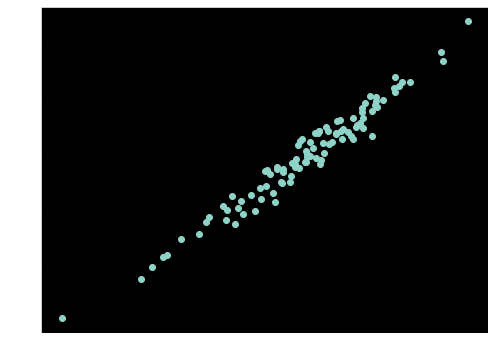

In [3]:
fig=plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y)
plt.show()

In [4]:
X_train_t=torch.from_numpy(X_train)
type(X_train_t)

torch.Tensor

In [5]:
X_test_t=torch.from_numpy(X_test)
type(X_test_t)

torch.Tensor

In [6]:
y_train_t=torch.from_numpy(y_train)
type(y_train_t)

torch.Tensor

In [7]:
y_test_t=torch.from_numpy(y_test)
type(y_test_t)

torch.Tensor

In [8]:
X_train_T_t=torch.from_numpy(X_train.T)
type(X_train_T_t)

torch.Tensor

In [9]:
lr=0.01
n_iters=1000

### fit function:

In [10]:
n_samples,n_features=X_train_t.shape
print(n_samples,n_features)

80 1


In [11]:
weights=np.zeros(n_features)
weights=torch.from_numpy(weights)
weights

tensor([0.], dtype=torch.float64)

In [12]:
bias=0
var1=1/n_samples

In [13]:
for _ in range(n_iters):  
    a=[]     
    for i in X_train_t:    # np.dot(X, self.weights)
        t=np.dot(i,weights)
        a.append(t)

    a=torch.tensor(a)

    y_pred_t=a+bias  # y_pred=np.dot(X, self.weights) + bias 

    r=y_pred_t-y_train_t

    p=[]
    for i in X_train_T_t:
        t=np.dot(i,r)
        p.append(t)
    
    p=torch.tensor(p)
    dw=var1*p
    d=0
    for m in r:
        d+=m

    db=var1*d

    dw=dw*lr
    weights=weights-dw

    db=db*lr
    bias=bias-db

In [14]:
bias

tensor(0.9206, dtype=torch.float64)

In [15]:
weights

tensor([87.4040], dtype=torch.float64)

In [17]:
predictions=(X_test_t*weights)+bias
predictions

tensor([[  22.5786],
        [ -54.7141],
        [  41.5103],
        [  87.6206],
        [-195.0990],
        [  49.2933],
        [ -77.4945],
        [  11.8210],
        [  26.1884],
        [   7.5807],
        [ -80.0377],
        [  62.5160],
        [  78.4621],
        [  62.4729],
        [ -29.2133],
        [  42.1259],
        [  91.2789],
        [-121.6174],
        [ 116.3905],
        [  74.4281]], dtype=torch.float64)

In [19]:
y_test_t

tensor([  -6.4004,  -75.8329,   43.0244,   81.7216, -197.9802,   32.0971,
        -102.6675,   15.3507,    6.8923,   26.2885,  -80.3690,   30.8459,
          95.0686,   69.4388,  -45.8087,   63.1880,   91.4160, -108.3774,
         142.7546,   87.7721], dtype=torch.float64)